# K Means clustering
K means clustering involves fitting the observations into a pre-defined number of groups; this starts with the placement of centroids. Those centroids then move towards the center of all the points in their cluster, then this process repeats until the clusters aren't moving any more.  

One downside to this simple technique is that you have to know the number of clusters that you want to use beforehand, rather than with techniques such as heirarchical clustering. Below is a simple implementation of the K means algorithm using the classical iris dataset. 


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing 

%matplotlib inline

In [2]:
# Read in our simple data 
iris = pd.read_csv('Iris.csv').drop('Id', 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The 4 features that we have appear to be on different scales, which might be a problem with distance-based methods, as those on a larger scale will have more power than those magnitudes smaller. We can get around this by normalising and scaling our data. 

In [3]:
species = iris['Species']
iris = iris.drop('Species', 1)

# Get the column names 
colnames = list(iris.columns.values)

# Pre-process the data without the string column for species 
iris_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(iris))
iris_scaled.columns = colnames
iris_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


Note that the metrics have obviously become completely wrong in this process, but I have kept the column names purely for comparison reasons. 

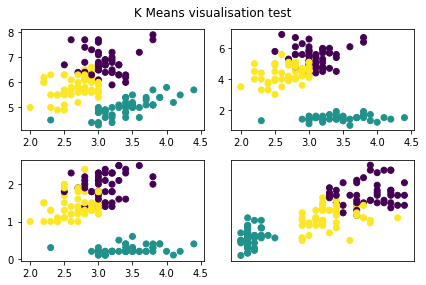

In [4]:
# Instantiate a model with 3 centers
kmeans = KMeans(3)

# Then fit the model to your data using the fit method
model = kmeans.fit(iris_scaled)

# Finally predict the labels on the same data to show the category that point belongs to
labels = model.predict(iris_scaled)

# Plot the results and see if they make sense
plt.subplot(221)
plt.scatter(iris.iloc[:, 1], iris.iloc[:, 0], c = labels)

plt.subplot(222)
plt.scatter(iris.iloc[:, 1], iris.iloc[:, 2], c = labels)

plt.subplot(223)
plt.scatter(iris.iloc[:, 1], iris.iloc[:, 3], c = labels)

plt.subplot(224)
plt.scatter(iris.iloc[:, 3], iris.iloc[:, 0], c = labels)

plt.suptitle('K Means visualisation test')
plt.tight_layout()
plt.subplots_adjust(top = .9)
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
plt.show()

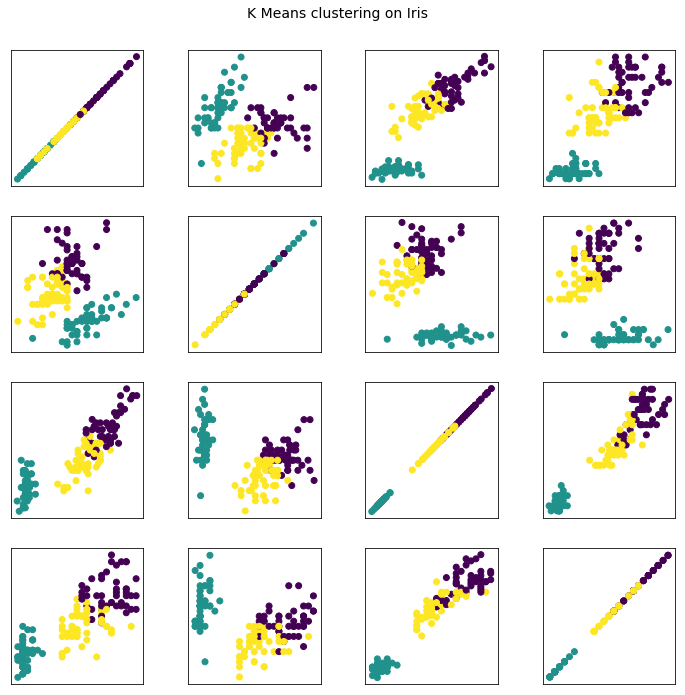

In [5]:
def plot_clusters(idx_1, idx_2, labels, axes):
    """
    Take two indexes for iris data and labels to plot 
    """
    axes.scatter(iris.iloc[:, idx_1], iris.iloc[:, idx_2], c = labels)
    axes.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (10, 10))
fig.tight_layout()
fig.suptitle('K Means clustering on Iris', fontsize = 14)
fig.subplots_adjust(top = .92)

# Loop through the features and plot them 
count = 0

for i in range(4):
    for j in range(4):
        plot_clusters(i, j, labels, ax.flatten()[count])
        count += 1